In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Liat-liat

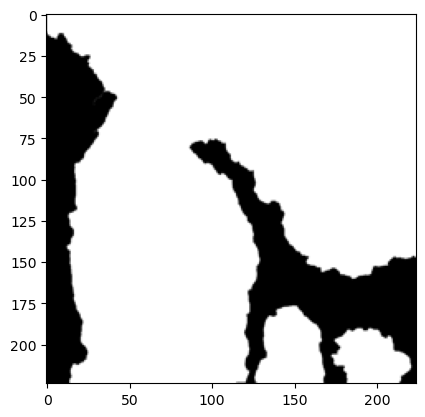

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fname = "EBHI-SEG/Adenocarcinoma/label/GT2001837-1-400-002.png"

image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

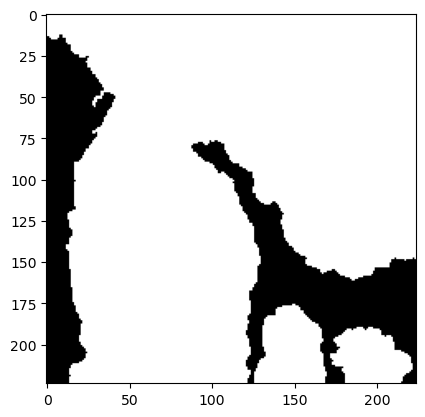

In [10]:
arr2 = (arr > 0.5).astype(int)
plt.imshow(arr2, cmap='gray')

## Ini serius nyoba

### Split dataset dulu ya ges ya

In [11]:
original_dataset_path = 'EBHI-SEG'

class_label = ['Low-grade IN',
 'Adenocarcinoma',
 'High-grade IN',
 'Normal',
 'Polyp',
 'Serrated adenoma']

split_ratio = 0.8

In [12]:
import os
from sklearn.model_selection import train_test_split

list_files = []

for names in class_label:
    images_dir = os.path.join(original_dataset_path, names, 'image')
    labels_dir = os.path.join(original_dataset_path, names, 'label')
    images_file = os.listdir(images_dir)
    
    for image in images_file:
        image_path = os.path.join(images_dir, image)
        label_path = os.path.join(labels_dir, image)
        if not os.path.exists(label_path):
            continue
        list_files.append(image_path)
    
    print(f"Panjang {images_dir} sebesar {len(images_file)}")
        
del images_dir , labels_dir, image_path, label_path



Panjang EBHI-SEG/Low-grade IN/image sebesar 639
Panjang EBHI-SEG/Adenocarcinoma/image sebesar 795
Panjang EBHI-SEG/High-grade IN/image sebesar 186
Panjang EBHI-SEG/Normal/image sebesar 76
Panjang EBHI-SEG/Polyp/image sebesar 474
Panjang EBHI-SEG/Serrated adenoma/image sebesar 58


In [13]:
len(list_files)

2226

In [14]:
list_files

['EBHI-SEG/Low-grade IN/image/GTXC2014165-2-400-003.png',
 'EBHI-SEG/Low-grade IN/image/GTXC2015407-1-400-006.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2012481-1-400-003.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2014132-1-400-005.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2012967-1-400-005.png',
 'EBHI-SEG/Low-grade IN/image/GT2014646-1-400-001.png',
 'EBHI-SEG/Low-grade IN/image/GT2100144-1-400-002.png',
 'EBHI-SEG/Low-grade IN/image/GTXC2015417-1-400-002.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2014080-1-400-008.png',
 'EBHI-SEG/Low-grade IN/image/GTXC2014192-2-400-005.png',
 'EBHI-SEG/Low-grade IN/image/GTXC2015383-1-400-002.png',
 'EBHI-SEG/Low-grade IN/image/GTXC2015362-3-400-003.png',
 'EBHI-SEG/Low-grade IN/image/GTXC2014136-1-400-004.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2012960-1-400-001.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2012827-1-400-001.png',
 'EBHI-SEG/Low-grade IN/image/GT2012246-1-400-004.png',
 'EBHI-SEG/Low-grade IN/image/GTxc2012779-1-400-001.png',
 'EBHI-SEG/Low-grade

In [231]:
traindata, valtestdata = train_test_split(list_files, test_size=0.3, random_state=42)
valdata, testdata = train_test_split(valtestdata, test_size=0.33, random_state=42)

In [232]:
len(traindata) , len(valdata), len(testdata)

(1558, 447, 221)

In [199]:
import numpy as np

for data in enumerate((traindata, valdata, testdata)):
    np.savetxt(f"{data}.csv")

1558

In [266]:
import pandas as pd
pd.DataFrame(traindata).to_csv('traindata.csv', index=False)
pd.DataFrame(valdata).to_csv('valdata.csv', index=False)
pd.DataFrame(testdata).to_csv('testdata.csv', index=False)

In [267]:
pd.read_csv('testdata.csv')

,0
0,EBHI-SEG/Adenocarcinoma/image/GTXC2013386-1-40...
1,EBHI-SEG/Adenocarcinoma/image/GT2100120-3-400-...
2,EBHI-SEG/Polyp/image/GTXC2110530-1-400-016.png
3,EBHI-SEG/Low-grade IN/image/GTxc2012983-2-400-...
4,EBHI-SEG/Normal/image/GT2100093-1-400-002.png
...,...
216,EBHI-SEG/Low-grade IN/image/GTxc2014132-1-400-...
217,EBHI-SEG/Adenocarcinoma/image/GT2014822-1-400-...
218,EBHI-SEG/Adenocarcinoma/image/GT2012353-1-400-...
219,EBHI-SEG/Adenocarcinoma/image/GTxc2013965-1-40...


In [253]:
import shutil

for dataset_path in [traindir, valdir, testdir]:
    for label in class_label:
        os.makedirs(os.path.join(dataset_path, label, 'image'), exist_ok=True)
        os.makedirs(os.path.join(dataset_path, label, 'label'), exist_ok=True)


In [254]:
for image_path in traindata:
    if image_path.split('/')[-1] == '.DS_Store':
        continue
    # image_file = image_file.split('/')[-1]
    dst_image_path = image_path.replace(source, traindir)

    label_path = image_path.replace('image','label')
    dst_label_path = label_path.replace(source, traindir)

    if not os.path.exists(label_path):
        continue
    shutil.copy(image_path, dst_image_path)
    shutil.copy(label_path, dst_label_path)

In [255]:
for image_path in valdata:
    if image_path.split('/')[-1] == '.DS_Store':
        continue
    # image_file = image_file.split('/')[-1]
    dst_image_path = image_path.replace(source, valdir)

    label_path = image_path.replace('image','label')
    dst_label_path = label_path.replace(source, valdir)

    if not os.path.exists(label_path):
        continue
    shutil.copy(image_path, dst_image_path)
    shutil.copy(label_path, dst_label_path)

In [256]:
for image_path in testdata:
    if image_path.split('/')[-1] == '.DS_Store':
        continue
    # image_file = image_file.split('/')[-1]
    dst_image_path = image_path.replace(source, testdir)

    label_path = image_path.replace('image','label')
    dst_label_path = label_path.replace(source, testdir)

    if not os.path.exists(label_path):
        continue
    shutil.copy(image_path, dst_image_path)
    shutil.copy(label_path, dst_label_path)

In [257]:
os.listdir('EBHI-SEG-Train')

['Low-grade IN',
 'Adenocarcinoma',
 'High-grade IN',
 'Normal',
 'Polyp',
 'Serrated adenoma']

In [258]:
for dir_path in [traindir, valdir, testdir]:
    print(f"Ini dari {dir_path}")
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    print("==================")

Ini dari EBHI-SEG-Train
There are 6 directories and 0 images in 'EBHI-SEG-Train'.
There are 2 directories and 0 images in 'EBHI-SEG-Train/Low-grade IN'.
There are 0 directories and 427 images in 'EBHI-SEG-Train/Low-grade IN/label'.
There are 0 directories and 427 images in 'EBHI-SEG-Train/Low-grade IN/image'.
There are 2 directories and 0 images in 'EBHI-SEG-Train/Adenocarcinoma'.
There are 0 directories and 578 images in 'EBHI-SEG-Train/Adenocarcinoma/label'.
There are 0 directories and 578 images in 'EBHI-SEG-Train/Adenocarcinoma/image'.
There are 2 directories and 0 images in 'EBHI-SEG-Train/High-grade IN'.
There are 0 directories and 128 images in 'EBHI-SEG-Train/High-grade IN/label'.
There are 0 directories and 128 images in 'EBHI-SEG-Train/High-grade IN/image'.
There are 2 directories and 0 images in 'EBHI-SEG-Train/Normal'.
There are 0 directories and 55 images in 'EBHI-SEG-Train/Normal/label'.
There are 0 directories and 55 images in 'EBHI-SEG-Train/Normal/image'.
There are 2 d